In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
def binary_cross_entropy_loss(Y_true, Y_pred):
    return -np.mean(Y_true*np.log(Y_pred)+(1-Y_true)*np.log(1-Y_pred))

In [3]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [4]:
def normalize_features(df):
    df=df.copy()
    df['Gender']=df['Gender'].map({'Female':0, 'Male':1})
    
    for column in ['Age', 'EstimatedSalary']:
        df[column]=(df[column]-df[column].mean())/df[column].std()
    
    return df


In [5]:
def fit_logistic_regression(X, y, learning_rate, num_epochs):
    samples,features=X.shape
    weights=np.zeros(features)
    bias=0

    for epoch in range(num_epochs):
        logistic_model=np.dot(X, weights)+bias
        y_pred=sigmoid(logistic_model)
        dw=(1/samples)*np.dot(X.T,(y_pred-y))
        db=(1/samples)*np.sum(y_pred-y)
        weights-=learning_rate*dw
        bias-=learning_rate*db
    
    return weights, bias


In [6]:
def predict(X, weights, bias, threshold=0.5):
    probabilities=sigmoid(np.dot(X, weights)+bias)
    return (probabilities>=threshold).astype(int)

In [7]:
def evaluate_metrics(y_true, y_pred):
    accuracy=accuracy_score(y_true, y_pred)
    precision=precision_score(y_true, y_pred)
    recall=recall_score(y_true, y_pred)
    f1=f1_score(y_true, y_pred)
    print(f"Accuracy:{accuracy}")
    print(f"Precision:{precision}")
    print(f"Recall:{recall}")
    print(f"F1 Score:{f1}")


In [8]:
def plot_roc_curve(Y_true, Y_scores):
    fpr, tpr, _=roc_curve(Y_true, Y_scores)
    roc_auc=auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve(area={roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

In [9]:
def plot_confusion_matrix(y_true, y_pred):
    plt.matshow(confusion_matrix(y_true,y_pred),cmap='Blues')
    plt.colorbar()
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

Accuracy:0.5
Precision:1.0
Recall:0.3055555555555556
F1 Score:0.46808510638297873


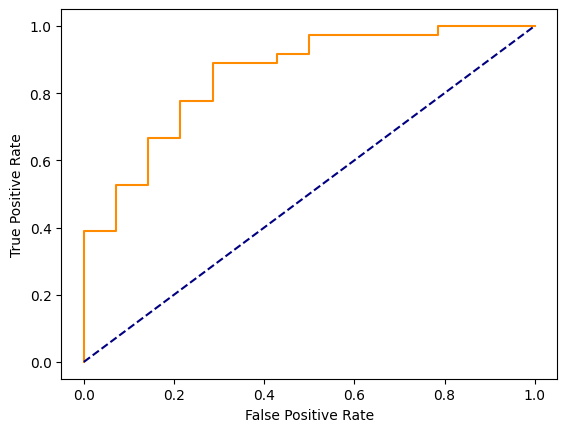

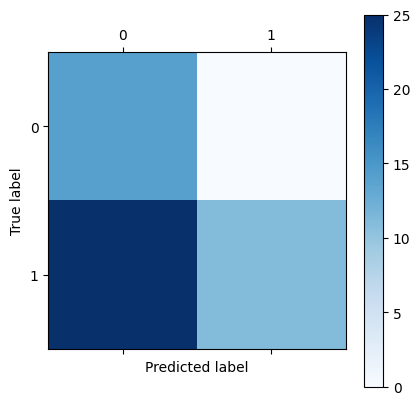

In [22]:
def main():
    data_train = pd.read_csv('train.csv')
    data_test = pd.read_csv('test.csv')
    
    # Normalize the features and handle categorical data
    data_train = normalize_features(data_train)
    data_test = normalize_features(data_test)
    
    # Extract features and labels
    X_train = data_train[['Gender', 'Age', 'EstimatedSalary']].values
    y_train = data_train['Purchased'].values
    X_test = data_test[['Gender', 'Age', 'EstimatedSalary']].values
    y_test = data_test['Purchased'].values

    # Train logistic regression model
    learning_rate = 0.1
    num_epochs = 100
    weights, bias = fit_logistic_regression(X_train, y_train, learning_rate, num_epochs)

    # Make predictions on the test set
    y_pred_test = predict(X_test, weights, bias)
    
    # Calculate and print evaluation metrics
    evaluate_metrics(y_test, y_pred_test)
    
    # Generate and plot ROC curve
    y_scores = sigmoid(np.dot(X_test, weights) + bias)  # Calculate probabilities for ROC
    plot_roc_curve(y_test, y_scores)
    
    # Generate and plot confusion matrix
    plot_confusion_matrix(y_test, y_pred_test)

# Run the main function
if __name__ == "__main__":
    main()